### module 

In [2]:
import mysql.connector
from datetime import datetime
import mysql.connector
import pandas as pd
import warnings
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


### function 

In [3]:
def get_table_names(host, user, password, database):
    try:
        # Establish a database connection
        conn = mysql.connector.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )

        # Create a cursor object
        cursor = conn.cursor()

        # Execute a query to retrieve table names
        query = f"SELECT table_name FROM INFORMATION_SCHEMA.TABLES WHERE table_schema = '{database}'"
        cursor.execute(query)

        # Fetch all the rows
        tables = cursor.fetchall()

        # Print table names
        # for (table_name,) in tables:
        #     print(table_name)

    except mysql.connector.Error as error:
        print(f"Error: {error}")
    finally:
        if conn.is_connected():
            cursor.close()
            conn.close()
            return tables

In [4]:
def table_to_dataframe(host, user, password, database, table_name):
    try:
        # Establish a database connection
        conn = mysql.connector.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )

        # Use backticks around the table name in the query
        query = f"SELECT * FROM `{table_name}`"

        # Use pandas to read the query into a DataFrame
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            df = pd.read_sql(query, conn)

        return df

    except mysql.connector.Error as error:
        print(f"Error: {error}")
        return None
    finally:
        if conn.is_connected():
            conn.close()

In [5]:
def show_amount(df):

    sns.histplot(df['거래대금'], kde=True)

    plt.title('Distribution of 거래대금')
    plt.xlabel('거래대금')
    plt.ylabel('Density')

    plt.show()

In [6]:
def num_to_won(num):
    kor_won_uk = num / 1e8
    return kor_won_uk

### implement

In [7]:
# databaseA = "A" + datetime.now().strftime("%Y%m%d") 
databaseA = 'a20240112'
password = '93150lbm!!'

tables = get_table_names('127.0.0.1', 'root', password, databaseA)

tables = [code for (code,) in tables]
print(tables)

['000440', '005290', '009620', '009730', '013990', '021080', '024060', '025320', '027360', '027830', '029480', '033540', '036540', '036630', '038870', '041020', '041190', '041460', '047310', '048770', '049080', '050890', '053050', '056080', '057680', '058610', '059100', '060250', '060280', '060310', '064260', '065350', '065450', '066790', '068760', '072950', '080220', '080530', '085670', '086960', '088800', '090150', '090360', '090710', '094170', '094480', '096630', '098460', '099440', '104480', '108490', '115160', '117730', '129890', '136480', '142210', '203650', '205100', '205470', '207760', '208340', '214270', '214680', '215100', '218150', '227100', '228760', '232140', '241820', '253590', '254120', '264850', '270520', '270660', '277070', '290690', '291230', '293580', '299900', '306620', '307930', '317830', '319400', '321260', '321370', '348340', '356680', '380540', '382800', '383930', '388790', '391710', '403870', '417200', '419050', '419270', '450520', '452190', '452300', '900250']

In [26]:
code = tables[0]

df = table_to_dataframe('127.0.0.1', 'root', password, databaseA, code)
df['체결시간'] = pd.to_datetime(df['체결시간'])
df['현재가'] = pd.to_numeric(df['현재가'].str.replace('+','').str.replace('-',''), errors='coerce')
df['거래량'] = pd.to_numeric(df['거래량'], errors='coerce')
df['거래대금'] = df['현재가'] * df['거래량']
df = df.sort_values(by='체결시간', ignore_index=True)
df['time_diff'] = df['체결시간'].diff()
df['time_diff_seconds'] = df['time_diff'].dt.total_seconds()

df


,id,체결시간,현재가,거래량,거래대금,time_diff,time_diff_seconds
0,1,2024-01-12 09:41:33.012765,18750,39,731250,NaT,NaN
1,2,2024-01-12 09:41:36.405014,18740,-5,-93700,0 days 00:00:03.392249,3.392249
2,3,2024-01-12 09:41:37.399747,18740,1,18740,0 days 00:00:00.994733,0.994733
3,4,2024-01-12 09:41:43.996522,18730,-146,-2734580,0 days 00:00:06.596775,6.596775
4,5,2024-01-12 09:41:46.801512,18740,20,374800,0 days 00:00:02.804990,2.804990
...,...,...,...,...,...,...,...
8896,8895,2024-01-12 15:19:52.595263,18960,303,5744880,0 days 00:00:00.001522,0.001522
8897,8898,2024-01-12 15:19:55.805188,18920,-30,-567600,0 days 00:00:03.209925,3.209925
8898,8899,2024-01-12 15:19:57.598681,18960,1,18960,0 days 00:00:01.793493,1.793493
8899,8900,2024-01-12 15:30:25.579565,19090,7559,144301310,0 days 00:10:27.980884,627.980884


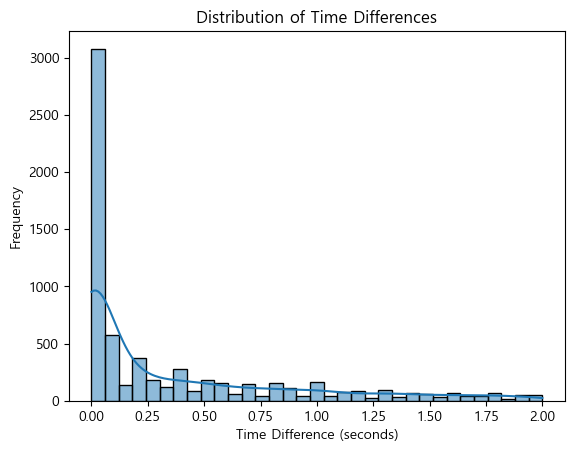

In [31]:
sns.histplot(df['time_diff_seconds'][df['time_diff_seconds']<2].dropna(), kde=True)

plt.title('Distribution of Time Differences')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')

plt.show()

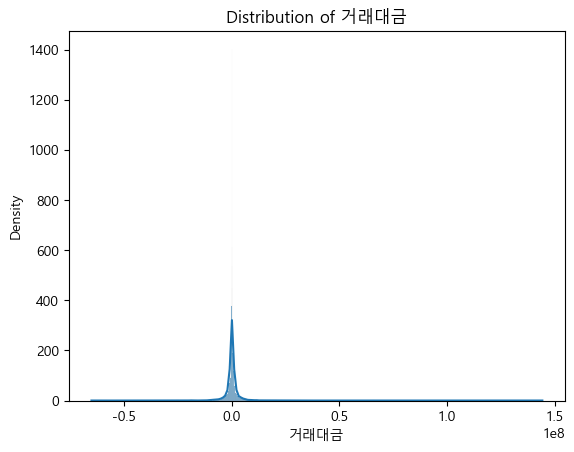

In [25]:
sns.histplot(df['거래대금'], kde=True)

plt.title('Distribution of 거래대금')
plt.xlabel('거래대금')
plt.ylabel('Density')

plt.show()

000440
전체 거래대금 합 : -1.4088억
minus : -0.65억, max : 1.44억


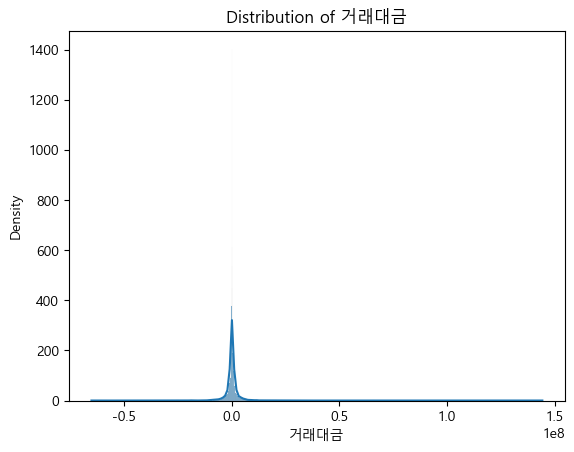

005290
전체 거래대금 합 : -60.5118억
minus : -5.04억, max : 17.57억


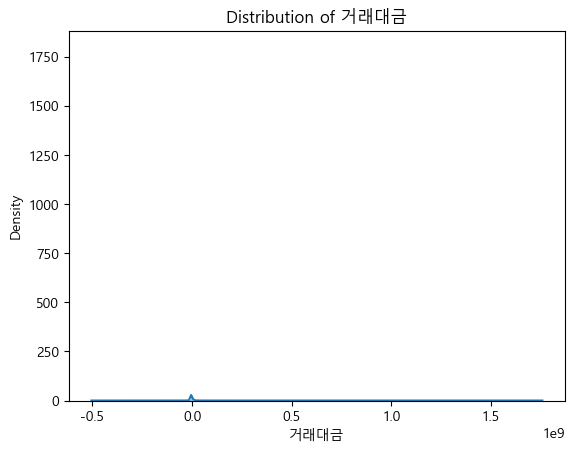

009620
전체 거래대금 합 : 2.0274억
minus : -0.3억, max : 0.56억


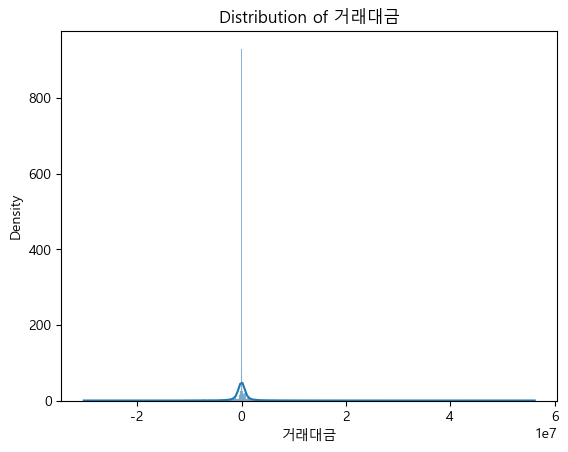

009730
전체 거래대금 합 : 0.8901억
minus : -0.63억, max : 1.97억


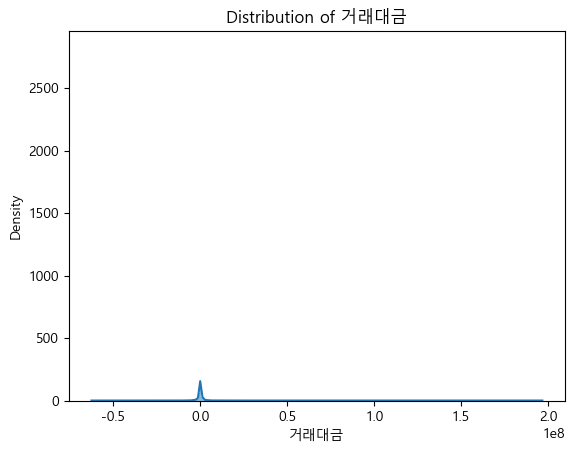

013990
전체 거래대금 합 : -22.2484억
minus : -0.58억, max : 3.24억


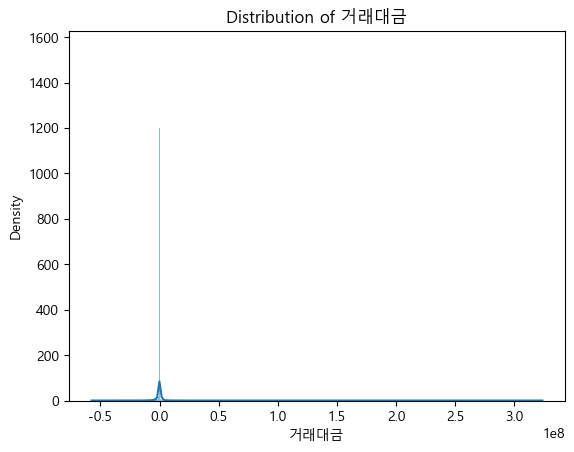

In [21]:
for code in tables[:5]:

    df = table_to_dataframe('127.0.0.1', 'root', password, databaseA, code)
    df['체결시간'] = pd.to_datetime(df['체결시간'])
    df['현재가'] = pd.to_numeric(df['현재가'].str.replace('+','').str.replace('-',''), errors='coerce')
    df['거래량'] = pd.to_numeric(df['거래량'], errors='coerce')
    df['거래대금'] = df['현재가'] * df['거래량']
    df = df.sort_values(by='체결시간', ignore_index=True)
    print(code)
    print(f"전체 거래대금 합 : {round(num_to_won(df['거래대금'].sum()),2)}억")
    print(f"minus : {round(num_to_won(df['거래대금'].min()),2)}억, max : {round(num_to_won(df['거래대금'].max()),2)}억")
    show_amount(df)

In [10]:
code = tables[0]

df = table_to_dataframe('127.0.0.1', 'root', password, databaseA, code)
df['체결시간'] = pd.to_datetime(df['체결시간'])
df['현재가'] = pd.to_numeric(df['현재가'].str.replace('+','').str.replace('-',''), errors='coerce')
df['거래량'] = pd.to_numeric(df['거래량'], errors='coerce')
df['거래대금'] = df['현재가'] * df['거래량']
df = df.sort_values(by='체결시간', ignore_index=True)
df['time_diff'] = df['체결시간'].diff()
df['time_diff_seconds'] = df['time_diff'].dt.total_seconds()

df = df.dropna()
df

,id,체결시간,현재가,거래량,거래대금,time_diff,time_diff_seconds
1,2,2024-01-12 09:41:36.405014,18740,-5,-93700,0 days 00:00:03.392249,3.392249
2,3,2024-01-12 09:41:37.399747,18740,1,18740,0 days 00:00:00.994733,0.994733
3,4,2024-01-12 09:41:43.996522,18730,-146,-2734580,0 days 00:00:06.596775,6.596775
4,5,2024-01-12 09:41:46.801512,18740,20,374800,0 days 00:00:02.804990,2.804990
5,6,2024-01-12 09:41:46.801512,18750,180,3375000,0 days 00:00:00,0.000000
...,...,...,...,...,...,...,...
8896,8895,2024-01-12 15:19:52.595263,18960,303,5744880,0 days 00:00:00.001522,0.001522
8897,8898,2024-01-12 15:19:55.805188,18920,-30,-567600,0 days 00:00:03.209925,3.209925
8898,8899,2024-01-12 15:19:57.598681,18960,1,18960,0 days 00:00:01.793493,1.793493
8899,8900,2024-01-12 15:30:25.579565,19090,7559,144301310,0 days 00:10:27.980884,627.980884


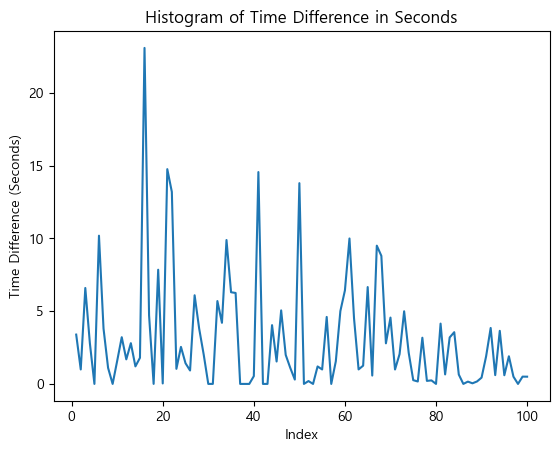

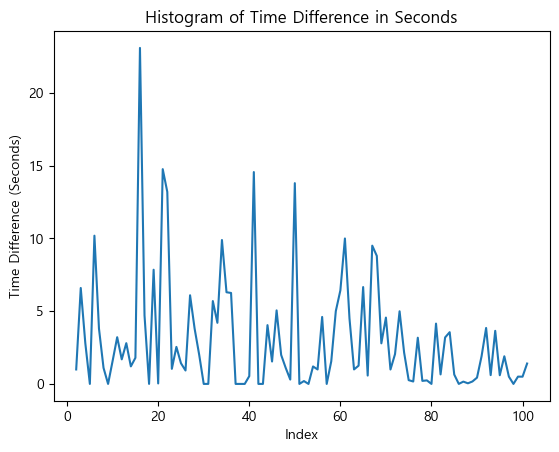

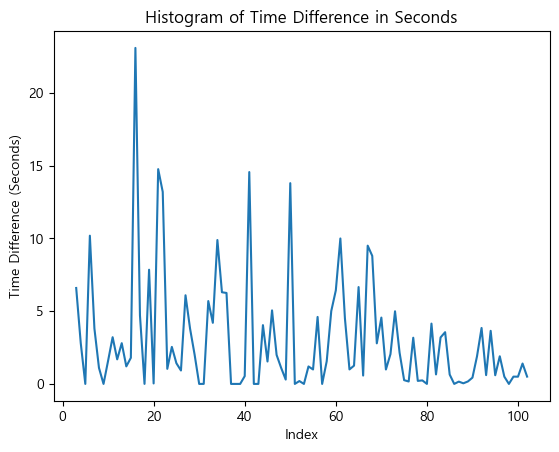

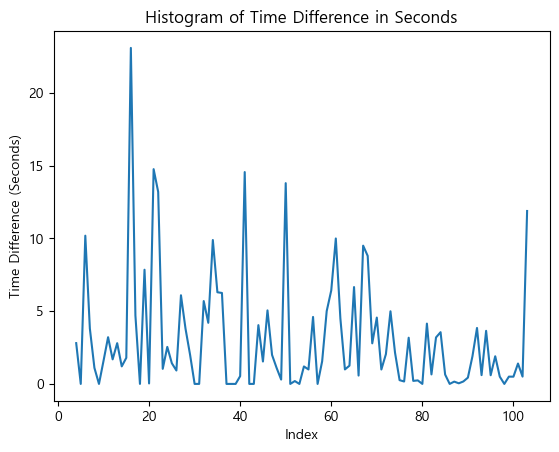

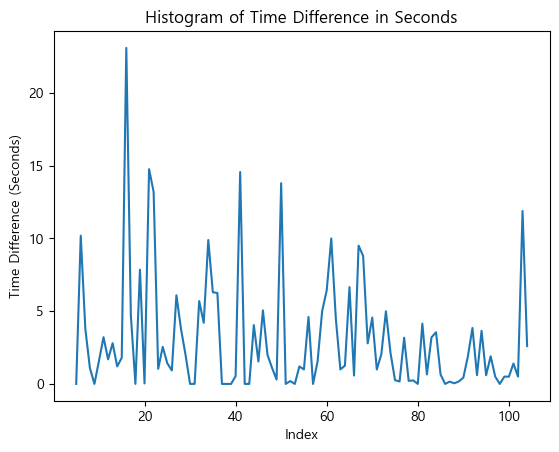

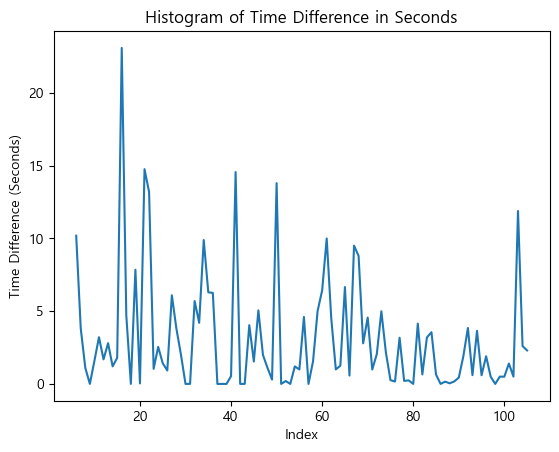

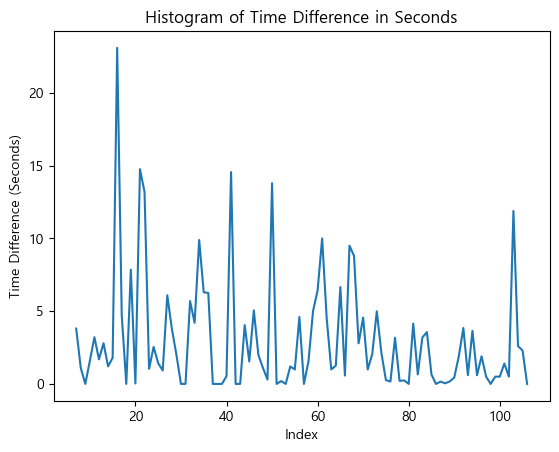

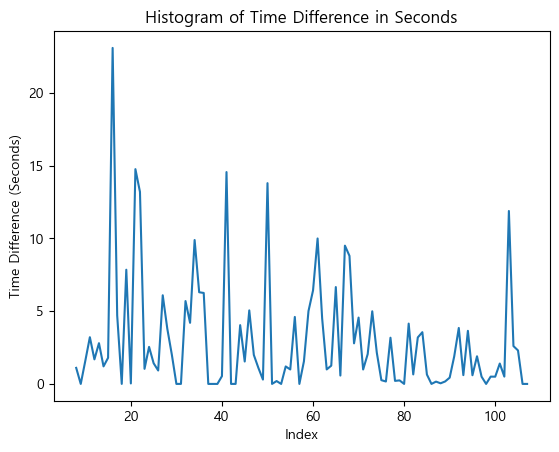

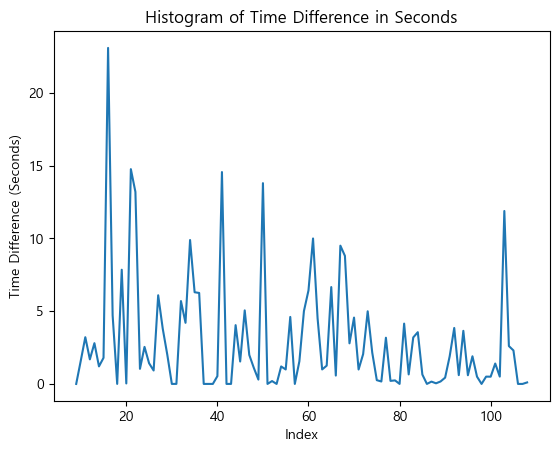

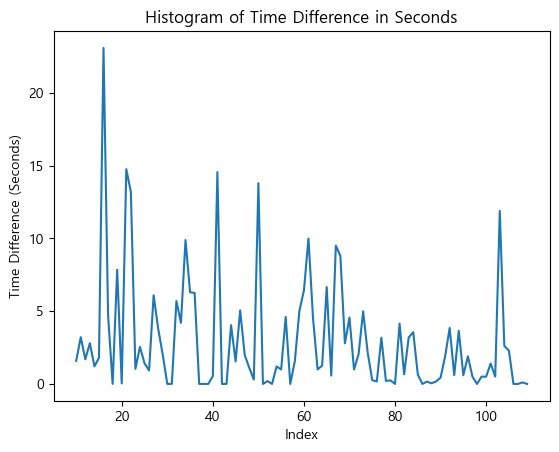

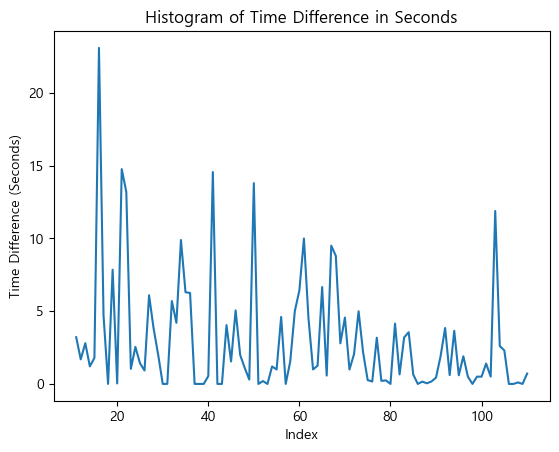

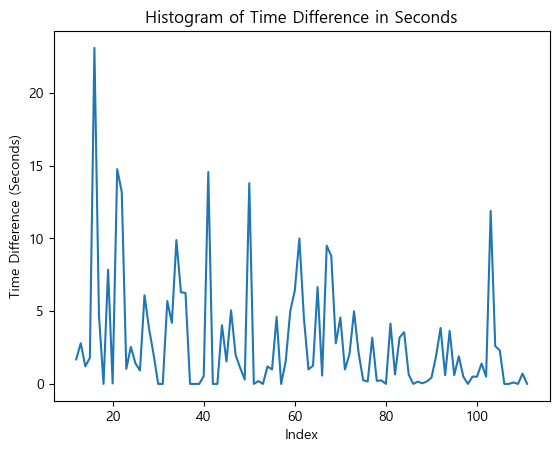

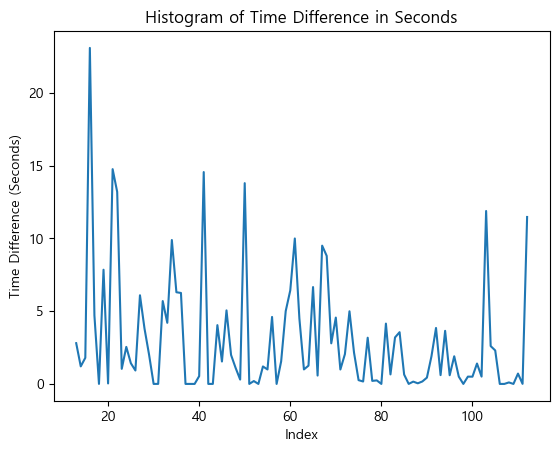

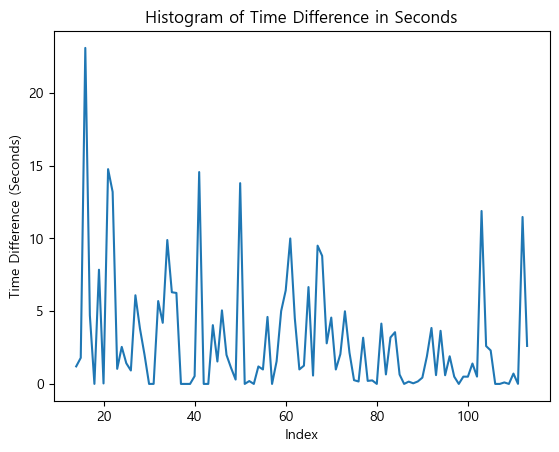

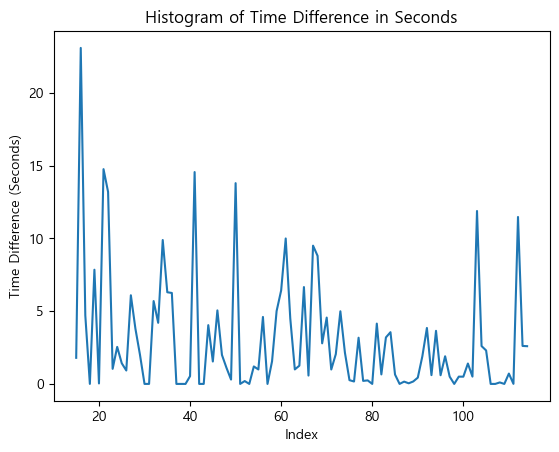

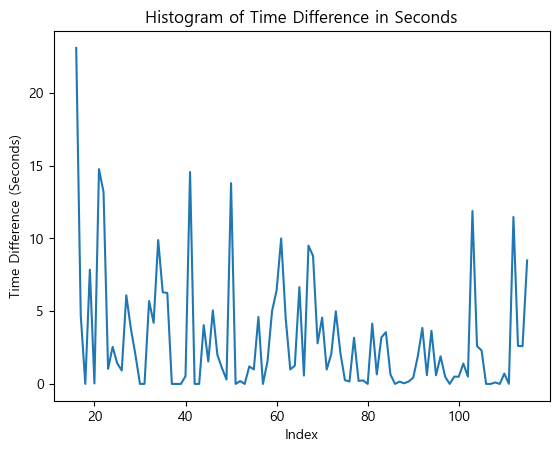

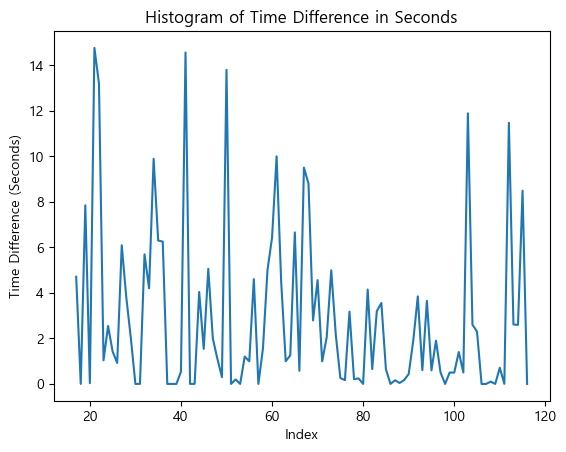

KeyboardInterrupt: 

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import time

# Assuming df is your DataFrame and it's already loaded
# df = pd.read_csv('your_data.csv')  # Replace with your DataFrame loading method

window_size = 100

# Create the plot outside the loop
plt.figure()

for i in range(len(df) - window_size + 1):
    plt.clf()  # Clear the current figure
    time_diff_seconds = df['time_diff_seconds'][i:i + window_size]
    plt.plot(time_diff_seconds)
    plt.title('Histogram of Time Difference in Seconds')
    plt.xlabel('Index')
    plt.ylabel('Time Difference (Seconds)')
    
    plt.draw()  # Redraw the current figure
    plt.pause(0.1)  # Pause for a short period to create an animation effect

    # This line is for Jupyter Notebooks to prevent too many figures from being opened
    plt.gcf().clear()

    time.sleep(0.1)  # Sleep to slow down the loop

plt.show()  # Show the plot


In [ ]:
window_size = 100


for i in range(len(df)):
    try : 
        time_diff_seconds = df['time_diff_seconds'][i:100]
        plt.plot(time_diff_seconds)
        plt.title('Histogram of Time Difference in Seconds')
        plt.xlabel('Time Difference (Seconds)')
        plt.ylabel('Frequency')
        plt.show()
        
    except : 
        break 

In [20]:
import numpy as np 

print(np.exp(-1))

0.36787944117144233
